In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

## problema 1
Un electrodo selectivo de iones y un electrodo de referencia se introdujeron en exactamente 100 mL de una muestra, obteniéndose una lectura de 21,6 mV.
Después de la adición de exactamente 10 mL de una solución estándar de concentración igual a 100 µg/mL, el par de electrodos dio una lectura de 43,7 mV.
Previamente se determinó que la pendiente de respuesta del electrodo indicador era igual a 57,8 mV. ¿Cuál es la concentración de la muestra?

In [2]:
V1 = 100        #mL
Vag = 10        #mL
Cag = 100       #ug/mL
E1 = 21.6       #mV
E2 = 43.7       #mV
S = 57.8        #mV
R = 8.314       #J/K.mol
T = 298.15      #K
F = 96485       #C/mol 
z = 1           

C1 = Cag*Vag/(10**((E2-E1)/S)*(V1+Vag)-V1)
print('La concentración de la muestra es: {:.4g} ug/mL' .format(C1))

Steo = R*T*np.log(10)*1000/(z*F)   
print('La pendiente debería ser S:{:.4g} mV' .format(Steo))

m = R*np.log(10)*1000/(z*F) 
print('La pendiente también es: {:.2g}* T mV/K' .format(m))

Tactual = S*z*F/(1000*R*np.log(10))
print('Si consideramos que la pendiente es S=R.T.ln(10)/F, la T:{:.4g} K = {:.4g}°C' .format(Tactual, Tactual-273.15))

La concentración de la muestra es: 6.049 ug/mL
La pendiente debería ser S:59.16 mV
La pendiente también es: 0.2* T mV/K
Si consideramos que la pendiente es S=R.T.ln(10)/F, la T:291.3 K = 18.16°C


## Problema 2
El sulfuro ácido de amonio se descompone según la reacción:
NH4HS (s) ↔ NH3 (g) + H2S (g),

con una constante de equilibrio Kp = 0,060 a 25ºC.

a) En un recipiente de paredes rígidas de 5 L se introducen 0,4 moles de NH4HS (s) a 25ºC. Calcular el número de moles de sólido que se habrán descompuesto cuando se haya alcanzado el equilibrio.

b) Repetir los cálculos del punto a) pero suponiendo que inicialmente hay en el recipiente 0,012 moles de H2S (g) además del sólido.

c) Explicar brevemente y justificando las respuestas, cómo se desplazaría el equilibrio del punto a) en el caso que:

i) se agregan 0,012 moles de NH3 (g) al sistema

ii) se agregan 0,100 moles de NH4HS (s) al sistema

iii) se disminuye el volumen del recipiente


In [3]:
Kp = 0.06
T = 298.15          #K
na = 0.4            #mol    
V = 5               #L
Rbar = 0.08314      #bar.L/K.mol

nb = 0.012
pi = nb*Rbar*T/V

p = np.sqrt(Kp)
print('(a) La presión de los gases será: {:.4g} bar' .format(p))

n = p*V/(Rbar*T) 
print('(a) El número de moles descompuestos será: {:.4g} mol' .format(n))

coeff = [1, pi, -Kp]
roots = np.roots(coeff)
print(roots)
px = roots[roots>0][0]
x = px*V/(Rbar*T)
print('(b) el número de moles descompuesto es:{:.4g} mol' .format(x))



(a) La presión de los gases será: 0.2449 bar
(a) El número de moles descompuestos será: 0.04941 mol
[-0.27649431  0.21700265]
(b) el número de moles descompuesto es:0.04377 mol


## Problema 3
Si se agregan 0,100 mol de BaF2 a 1,0 litro de buffer de pH= 4 (no hay cambio de volumen):

a. Calcular el número de moles de BaF2(s) que quedan sin disolver.

b. Calcular el número de moles máximo de CaCl2 que pueden agregarse a la solución resultante en (a) sin que se observe precipitación de CaF2 (s).

DATOS: Kps (BaF2) = 1,0.10-6; Kps (CaF2) = 3,98.10-11

In [4]:
KspBaF2 = 1e-6
KspCaF2 = 3.98e-11

n0 = 0.1            #mol
V = 1               #L
pH = 4
H = 10**(-pH)       #M

xa = (KspBaF2/4)**(1/3)*V 
print('Los moles disueltos de BaF2 a partir del equilibrio:{:.4g} mol' .format(xa))

nNoDis_a = n0-xa
print('Los moles no disueltos de BaF2 son:{:.4g} mol' .format(nNoDis_a))

F = 2*xa/V
nCa = V*KspCaF2/F**2
print('El Ca+2 máximo que puede disolverse antes de que haya precipitación es:{:.4g} mol' .format(nCa))

Los moles disueltos de BaF2 a partir del equilibrio:0.0063 mol
Los moles no disueltos de BaF2 son:0.0937 mol
El Ca+2 máximo que puede disolverse antes de que haya precipitación es:2.507e-07 mol


In [5]:
#Considerando equilibrio HF
pKaHF = 3.17
KaHF = 10**(-pKaHF)

xa = V*(KspBaF2 * (1+H/KaHF)**2 /4)**(1/3)
print('Los moles disueltos de BaF2, considerando eq ác-base:{:.4g} mol' .format(xa))

nNoDis_a = n0-xa
print('Los moles no disueltos de BaF2 son:{:.4g} mol' .format(nNoDis_a))

F = 2*(xa/V)*KaHF/(H+KaHF)
nCa = V*KspCaF2/F**2
print('El Ca+2 máximo que puede disolverse antes de que haya precipitación es:{:.4g} mol' .format(nCa))



Los moles disueltos de BaF2, considerando eq ác-base:0.006906 mol
Los moles no disueltos de BaF2 son:0.09309 mol
El Ca+2 máximo que puede disolverse antes de que haya precipitación es:2.749e-07 mol


# Trabajo práctico: Titulación ácido base
https://www.aqion.de/site/153

Polinomio:

$0=\frac{H^4}{Ka_1} + H^3 (1 + C_1/Ka_1) +  H^2 (C_1 - Kw/Ka_1 + Ka_2 - C_2) + H (C_1 Ka_2 - Kw - 2 C_2 Ka_2) - Kw Ka_2$

$C_1 = C_{NaOH} + C_{NaHCO_3} + 2 C_{K_2CO_3} - C_{HCl}$

$C_2 = C_{NaHCO_3} + C_{K_2CO_3}$

C(NaOH): 0.05 M, C(NaHCO3):0 M, C(K2CO3):0.09406 M


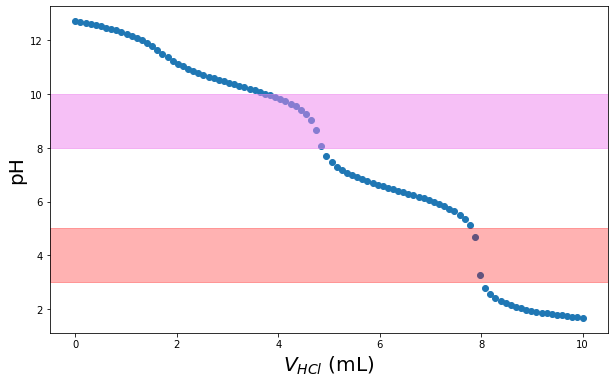

Los volumenes de HCl para el primer punto de equivalencia son:
NaOH:1.667 mL, NaHCO3:0 mL, K2CO3:3.135 mL


In [6]:
pKa1 = 6.4
pKa2 = 10.3
MrNaOH = 39.9971        #g/mol
MrNaHCO3 = 84.007       #g/mol
MrK2CO3 = 138.21        #g/mol

#sample = [1.3, 0, 0]    #masses in g
#sample = [1.3, 0.5, 0] #masses in g
sample = [1.3, 0, 0.2] #masses in g


mK2CO3 = sample[0]      #g
mNaHCO3 = sample[1]     #g      
mNaOH = sample[2]       #g      
V = 100                 #mL
V = V/1000              #L

Ka1 = 10**(-pKa1)
Ka2 = 10**(-pKa2)
Kw = 1e-14
CK2CO3 = mK2CO3/(MrK2CO3*V)
CNaHCO3 = mNaHCO3/(MrNaHCO3*V)
CNaOH = mNaOH/(MrNaOH*V)

print('C(NaOH): {:.4g} M, C(NaHCO3):{:.4g} M, C(K2CO3):{:.4g} M' .format(CNaOH, CNaHCO3, CK2CO3))

C10analito = CNaOH + CNaHCO3 + 2*CK2CO3
C20 = CNaHCO3 + CK2CO3 

Va = 5              #mL de analito
CHCl0 = 0.15
Vfinal = 10         #mL de titulante

step = int(Vfinal/0.1)
VHCls = np.linspace(0, Vfinal, step)

pHs = []
for VHCl in VHCls:
    Vtot = VHCl+Va
    C1analito = C10analito*Va/Vtot
    CHCl = CHCl0*VHCl/Vtot
    C1 = C1analito - CHCl
    C2 = C20*Va/Vtot
    coeff = [1/Ka1, 1+C1/Ka1, C1 - Kw/Ka1 + Ka2 - C2, C1*Ka2-Kw-2*C2*Ka2, -Kw*Ka2]
    roots = np.roots(coeff)
    H = roots[roots>0][0]
    pH = -np.log10(H)
    pHs.append(pH)

Figure, ax = plt.subplots(figsize = (10,6))
ax.scatter(VHCls, pHs)
ax.axhspan(8,10, color = 'violet', alpha = 0.5)
ax.axhspan(3,5, color = 'red', alpha = 0.3)
ax.set_xlabel('$V_{HCl}$ (mL)', fontsize = 20)
ax.set_ylabel('pH', fontsize = 20)
plt.show()

VHCl_to_NaOH = Va*CNaOH/CHCl0
VHCl_to_NaHCO3 = Va*CNaHCO3/CHCl0
VHCl_to_K2CO3 = Va*CK2CO3/CHCl0 

print('Los volumenes de HCl para el primer punto de equivalencia son:')
print('NaOH:{:.4g} mL, NaHCO3:{:.4g} mL, K2CO3:{:.4g} mL' .format(VHCl_to_NaOH, VHCl_to_NaHCO3, VHCl_to_K2CO3))
